In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import numpy.random as rnd
import random

In [55]:
def gen_regular_graph(n, k):
    G = nx.Graph()
    nodes = list(range(n))
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    return G

In [68]:
def find_attributes(G):
    G_comp = G.subgraph(max(nx.connected_component_subgraphs(G), key=len))
    return nx.average_shortest_path_length(G_comp), nx.transitivity(G_comp), sorted(list(dict(nx.degree(G_comp)).values()),reverse=True)

In [95]:
def plot_degrees(degrees):
    yh0, binEdges=np.histogram(degrees, bins=max(degrees))
    plt.plot(np.arange(1, max(degrees)+1), yh0, '-', lw=2)
    plt.ylabel('count')
    plt.xlabel('x')
    return

In [123]:
def rewind(G):
    G2 = G.copy()
    for v in G2:
        for e in list(G2.edges(v)):
            if rnd.random() < p:
                new_edge = (v, random.choice([w for w in list(G2.nodes) if w is not v and (v,w) not in G2.edges]))
                G2.add_edge(new_edge[0], new_edge[1])
                G2.remove_edge(e[0], e[1])
    return G2

In [119]:
n = 200
k = 5

-----------------
25.376884422110553 0.5
-----------------
-----------------
5.0455778894472365 0.23186119873817035
-----------------
-----------------
4.284554083549058 0.10229799851742032
-----------------
-----------------
4.149195979899497 0.07193229901269393
-----------------
-----------------
4.020658849804579 0.03512396694214876
-----------------
-----------------
3.9739527252217606 0.014131897711978465
-----------------
-----------------
4.050201005025126 0.024861878453038673
-----------------
-----------------
3.911393074279672 0.021825396825396824
-----------------
-----------------
3.995533221663875 0.031746031746031744
-----------------
-----------------
3.9198072091473106 0.015473887814313346
-----------------


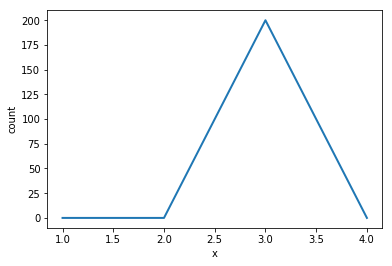

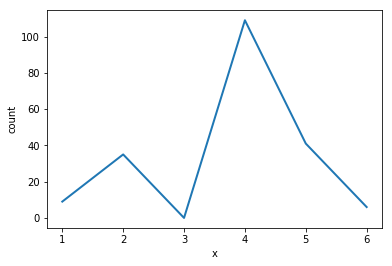

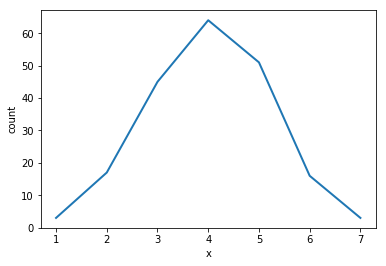

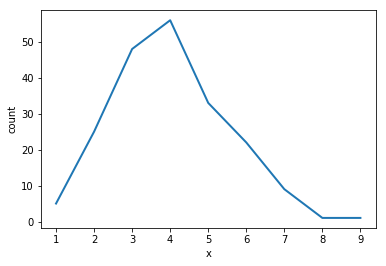

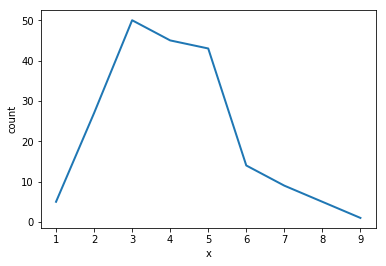

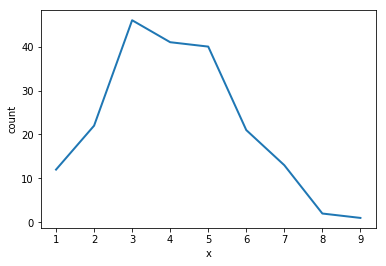

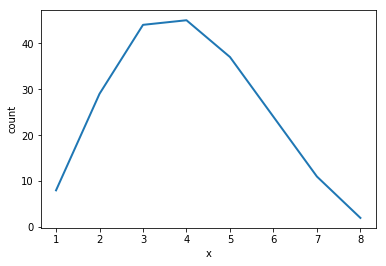

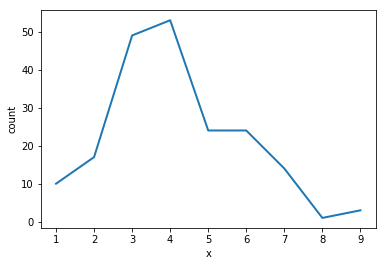

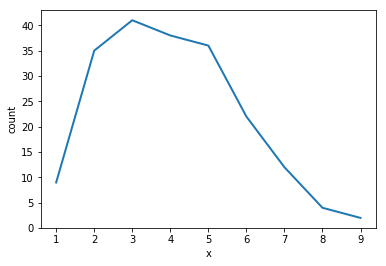

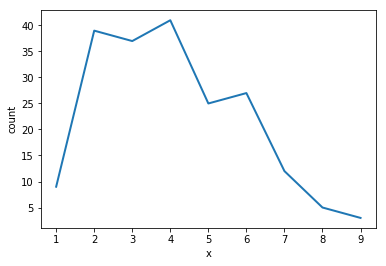

In [127]:
G = gen_regular_graph(n, k)
for p in np.linspace(0, 1, 10):
    G2 = rewind(G, p)
    attr = find_attributes(G2)
    print("-----------------")
    print(attr[0], attr[1])
    plot_degrees(attr[2])
    plt.figure()
    print("-----------------")

In [131]:
G = nx.read_gml("polblogs.gml")

NetworkXError: edge #12757 (1047->1179) is duplicated

Hint:  If this is a multigraph, add "multigraph 1" to the header of the file.